In [1]:
!pip install kaggle

In [2]:
kaggle = '/content/drive/MyDrive/Praktikum_ML/Praktikum13/data/kaggle.json'

In [3]:
! mkdir -p ~/.kaggle
! cp {kaggle} ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 1.52GB/s]


In [6]:
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extract_folder = "dataset"
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [7]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [8]:
len(data_0)

2236

Preprocessing Data Citra (MNIST)

In [16]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Menyiapkan list untuk data dan label
data = []
labels = []
IMG_SIZE = 28 # Ukuran standar 28x28 pixel

# Membaca gambar dari folder 0-9
for i in range(10):
    path = f'/content/dataset/{i}'
    for img in os.listdir(path):
        try:
            # Membaca gambar dalam mode grayscale (hitam putih)
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            # Resize ke 28x28 agar ukuran semua gambar seragam
            resized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append(resized_img)
            labels.append(i)
        except:
            pass

# Konversi ke Numpy Array dan Normalisasi (mengubah nilai 0-255 menjadi 0-1)
X = np.array(data).astype('float32') / 255.0
y = np.array(labels)

# Flattening: Mengubah gambar 2D (28,28) menjadi vektor 1D (784 fitur)
X_flat = X.reshape(X.shape[0], -1)

# Split data: 80% Latihan, 20% Uji
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

Arsitektur Mpdel MLP

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

# Input Layer & Hidden Layer 1: 512 neuron, aktivasi ReLU
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2)) # Untuk mencegah overfitting

# Hidden Layer 2: 256 neuron, aktivasi ReLU
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# Output Layer: 10 neuron (0-9), aktivasi Softmax untuk klasifikasi multi kelas
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Proses training dan evaluasi

In [20]:
# Proses Training
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

# Evaluasi menggunakan data uji (X_test)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nAkurasi Model: {accuracy*100:.2f}%")

Epoch 1/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.1059 - loss: 2.4454 - val_accuracy: 0.0997 - val_loss: 2.2952
Epoch 2/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1308 - loss: 2.2853 - val_accuracy: 0.1766 - val_loss: 2.2489
Epoch 3/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1584 - loss: 2.2413 - val_accuracy: 0.1960 - val_loss: 2.1867
Epoch 4/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1697 - loss: 2.2122 - val_accuracy: 0.1969 - val_loss: 2.1639
Epoch 5/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1765 - loss: 2.1939 - val_accuracy: 0.1824 - val_loss: 2.1435
Epoch 6/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.1775 - loss: 2.1921 - val_accuracy: 0.1658 - val_loss: 2.1906
Epoch 7/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1835 - loss: 2.1821 - val_accuracy: 0.1951 - val_loss: 2.1448
Epoch 8/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1743 - loss: 2.1940 - val_accu

Hasil Visualisasi dan Analisis Performa

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


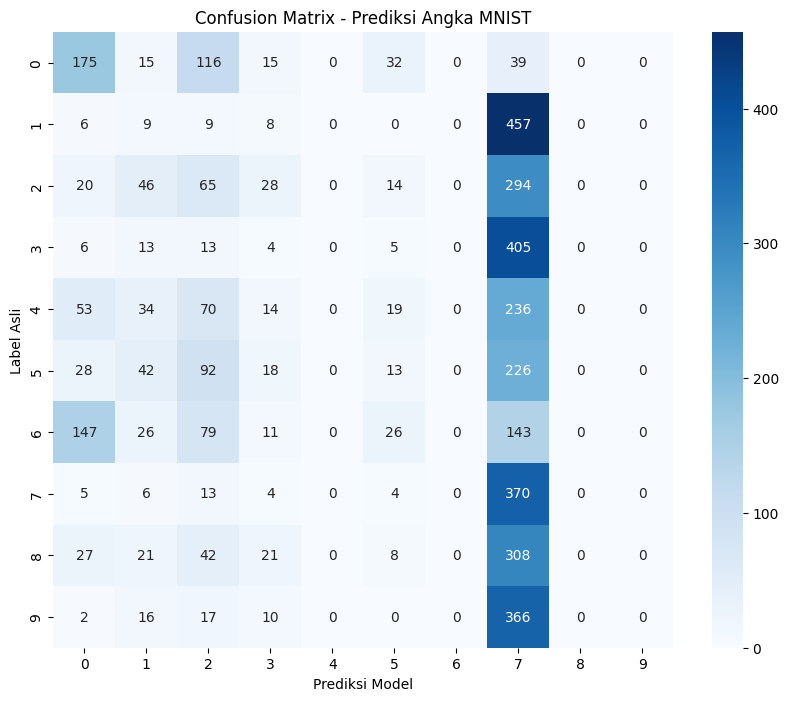


Laporan Performa Multi-Kelas:
              precision    recall  f1-score   support

           0       0.37      0.45      0.41       392
           1       0.04      0.02      0.03       489
           2       0.13      0.14      0.13       467
           3       0.03      0.01      0.01       446
           4       0.00      0.00      0.00       426
           5       0.11      0.03      0.05       419
           6       0.00      0.00      0.00       432
           7       0.13      0.92      0.23       402
           8       0.00      0.00      0.00       427
           9       0.00      0.00      0.00       411

    accuracy                           0.15      4311
   macro avg       0.08      0.16      0.09      4311
weighted avg       0.08      0.15      0.08      4311



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Membuat prediksi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Prediksi Angka MNIST')
plt.ylabel('Label Asli')
plt.xlabel('Prediksi Model')
plt.show()

# Laporan Klasifikasi (Precision, Recall, F1-Score)
print("\nLaporan Performa Multi-Kelas:")
print(classification_report(y_test, y_pred_classes))